In [1]:
from tensorflow.keras.models import Sequential #from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout #from keras.layers import Dense # from keras.layers import Dropout



# importing libraries:

import os, shutil
from os import listdir

import os, os.path
from os import listdir
import pandas as pd
import numpy as np
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt



import torch
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras
from matplotlib import pyplot
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd 

import sklearn.metrics
from sklearn.preprocessing import LabelEncoder # matplotlib inline
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from itertools import cycle
# for plotting ROC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score
from scipy import interp
from sklearn.metrics import roc_auc_score

# from keras.models import Sequential
# from keras.layers import Dense









#Red data from csv file for training and Validation data
TrainingSet = numpy.genfromtxt("training_set.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("testing_set.csv", delimiter=",", skip_header=True)

# split into input (X) and output (Y) variables
x_train = TrainingSet[:,0:3]
#x_train = TrainingSet[:,0]
y_train = TrainingSet[:,4]

x_test = ValidationSet[:,0:3]
#x_test = ValidationSet[:,0]

y_test = ValidationSet[:,4]

# create model

# create model
model = Sequential()
model.add(Dense(20, activation="relu", input_dim=3, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear"))


# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
# Decaying Learning Rate
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))
# Fixed Learning Rate:
#model.compile(optimizer='adam', loss='mse')
# Patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8000, verbose=2)#, callbacks=[es])# 10000000

# Calculate predictions
PredTestSet = model.predict(x_train)
PredValSet = model.predict(x_test)

# Save predictions
numpy.savetxt("trainresults_WSS_no_es_T1D1.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults_WSS_no_es_T1D1.csv", PredValSet, delimiter=",")



### Ploting:
# # Plot training history
# plt.clf()	
# plt.figure(1)
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# plt.title('Training History')
# plt.xlabel('Epoch')
# plt.ylabel('Validation Loss')
# plt.savefig('T1D1_es_VFR_loss.png')
# plt.savefig('T1D1_es_VFR_loss.eps')
# pyplot.show()


# # Compute R-Square value for training set
# TestResults = numpy.genfromtxt("trainresults_VFR_es.csv", delimiter=",")
# TestR2Value = r2_score(y_train,TestResults)
# print("Training Set R-Square=", TestR2Value)
# # Plot actual vs prediction for training set
# plt.clf()	
# plt.figure(2)
# plt.plot(y_train,TestResults,'ro', label='Training Set R-Square= = {:.4f})'.format(TestR2Value))
# # plt.title('Training Set')
# plt.title('Volumetric flow rate prediction for the training set') # Validation set
# plt.xlabel('Actual volumetric flow rate (CFD simulation)')
# plt.ylabel('Predicted volumetric flow rate (ML model)')
# plt.legend(loc='upper left')
# plt.savefig('T1D1_es_VFR_training.png')
# plt.savefig('T1D1_es_VFR_training.eps')
# pyplot.show()


# Compute R-Square value for validation set
ValResults = numpy.genfromtxt("valresults_WSS_no_es_T1D1.csv", delimiter=",")
ValR2Value = r2_score(y_test,ValResults)
print("Validation Set R-Square=",ValR2Value)
# Plot actual vs prediction for validation set
plt.clf()	
plt.figure(3)
plt.plot(y_test,ValResults,'ro',label='Validation Set R-Square = {:.4f})'.format(ValR2Value))
# plt.title('Validation Set')
plt.title('Wall shear stress prediction for the validation set') # Validation set
plt.xlabel('Actual wall shear stress (CFD simulation)')
plt.ylabel('Predicted wall shear stress (ML model)')
plt.legend(loc='upper left')
plt.savefig('NewT1D1_no_es_WSS_validation.png')
plt.savefig('NewT1D1_no_es_WSS_validation.eps')
#pyplot.show()


# ploting model in png and svg formats:
# plt.clf()
# plt.figure(4)
# plot_model(model, to_file='nonlinear_regression.png', show_shapes=True, show_layer_names=True)
# tf.keras.utils.plot_model(
#     model, to_file='nonlinear_regression_model_model.png', show_shapes=False, show_dtype=False,
#     show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
#     layer_range=None
# )

# Compile model
#loss_fn = 'mse'# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# model.compile(Adam(lr=0.01), loss ='mse', metrics=['accuracy'])
# model.summary()
# plt.figure(5)
# #plt.savefig("model_summary.png")
# from keras.models import load_model
# model.save("T1D1_VFR_es.h5")
"""
# Fit the model
#print(model.optimizer.lr)

# model.fit(x_train, y_train, epochs=500, batch_size=10,  verbose=2)
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=2)# 190

#print(model.loss)


# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=2)
_, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Calculate predictions
PredTestSet = model.predict(x_train)
PredValSet = model.predict(x_test)

# Save predictions
numpy.savetxt("trainresults_volumeflowrate.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults_volumeflowrate.csv", PredValSet, delimiter=",")

#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults_volumeflowrate.csv", delimiter=",")
TestR2Value = r2_score(y_train,TestResults)
plt.plot(y_train,TestResults,'ro', linestyle='')
plt.title('Volumetric flow rate prediction for training sets') # Training Set
plt.xlabel('Volumetric Flow Rate_CFD(simulation)')
plt.ylabel('Volumetric Flow Rate_ML(predicted)')
plt.grid(True)
plt.text(0.02, 4.4, r'R =' + str(TestR2Value), fontsize=15)
plt.legend(loc ='best')

plt.show()
#Compute R-Square value for training set

print("Training Set R-Square=", PredTestSet)

#Plot actual vs predition for Validation set
ValResults = numpy.genfromtxt("valresults_volumeflowrate.csv", delimiter=",")
ValR2Value = r2_score(y_test,PredValSet)
plt.plot(y_test,ValResults,'bo')
plt.title('Volumetric flow rate prediction for test sets') # Validation set
plt.xlabel('Volumetric Flow Rate_CFD(simulation)')
plt.ylabel('Volumetric Flow Rate_ML(predicted)')
plt.grid(True)

plt.text(2.24, 3.1, r'R =' + str(ValR2Value), fontsize=15)
plt.show()
plt.legend(loc ='best')
#Compute R-Square value for Validation set

print("Validation Set R-Square=",ValR2Value)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
# pyplot.show()
plt.subplots_adjust(hspace=0.5)

plt.savefig('T2D5_unaugmented.png')
# plt.savefig('T2D5_unaugmented.svg')


# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
predict_x = model.predict(x_test)
yhat_classes = np.argmax(predict_x,axis=1)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
print(yhat_classes)
print(y_test)


from keras.models import load_model
model.save("T2D5_unaugmented.h5")


####Accuracy score is only for classification problems. For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).
# accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test, yhat_classes) # yhat_classes
# print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes) # yhat_classes
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes) # yhat_classes
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes) # yhat_classes
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes) # yhat_classes
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes) # yhat_classes
print(matrix)


y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, yhat_probs) 
print(fpr_keras)
print(tpr_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

auc_keras2 = 1.0-auc_keras

plt.figure(2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.plot(1.0-fpr_keras, 1.0-tpr_keras, label='T2D5 = {:.3f})'.format(auc_keras2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
# plt.show()


plt.savefig('rocT2D5_unaugmented.png')
# plt.savefig('rocT2D5_unaugmented.svg')

plt.figure(3)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.plot(fpr_keras, tpr_keras, label='T2D5')
plt.plot(1.0-fpr_keras, 1.0-tpr_keras, label='T2D5')
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
# plt.show()


plt.savefig('rocT2D5_unaugmented2.png')
# plt.savefig('rocT2D5_unaugmented2.svg')

#Step 5: Calculate precision and recall values at different probability thresholds
precision2, recall2, threshold2 = precision_recall_curve(y_test, yhat_probs)

#Calculate average precision, note if we need to flip, use: ap2 = 1 - average_precision_score(y_test, yhat_probs)
ap2 = average_precision_score(y_test, yhat_probs)
print('Average Precision: %f' % ap2)



#Calculate average precision, note if we need to flip, use: ap2 = 1 - average_precision_score(y_test, yhat_probs)
ap3 = 1.0-average_precision_score(y_test, yhat_probs)
print('Average Precision2: %f' % ap3)


#Plot Precision-Recall curve
plt.figure(4)
plt.title('Precision-Recall Curve')
#Note if we need to flip, use: plt.plot(1-precision2, 1-recall2, 'r', label='T2D5 = %0.2f' % ap2)
plt.plot(1-precision2, 1-recall2, 'r', label='T2D5')
plt.legend(loc='upper left')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
# plt.show()
plt.savefig('PreRecallT2D5_unaugmented.png')
# plt.savefig('PreRecallT2D5_unaugmented.svg')


#Plot Precision-Recall curve
plt.figure(5)
plt.title('Precision-Recall Curve')
#Note if we need to flip, use: plt.plot(1-precision2, 1-recall2, 'r', label='T2D5 = %0.2f' % ap2)
plt.plot(1-precision2, 1-recall2, 'r', label='T2D5 = %0.2f' % ap3)
plt.legend(loc='upper left')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
# plt.show()
plt.savefig('PreRecallT2D5_unaugmented2.png')
# plt.savefig('PreRecallT2D5_unaugmented2.svg')

#Plot Precision-Recall curve
plt.figure(6)
plt.title('Precision-Recall Curve')
#Note if we need to flip, use: plt.plot(1-precision2, 1-recall2, 'r', label='T2D5 = %0.2f' % ap2)
plt.plot(precision2, recall2, 'r', label='T2D5')
plt.legend(loc='upper left')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
# plt.show()
plt.savefig('PreRecallT2D5_unaugmented3.png')
# plt.savefig('PreRecallT2D5_unaugmented3.svg')




#Plot Precision-Recall curve
plt.figure(7)
plt.title('Precision-Recall Curve')
#Note if we need to flip, use: plt.plot(1-precision2, 1-recall2, 'r', label='T2D5 = %0.2f' % ap2)
plt.plot(precision2, recall2, 'r', label='T2D5 = %0.2f' % ap2)
plt.legend(loc='upper left')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
# plt.show()
plt.savefig('PreRecallT2D5_unaugmented4.png')
plt.savefig('PreRecallT2D5_unaugmented4.svg')

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# model.compile(Adam(lr=0.01), loss ='mse', metrics=['accuracy'])
model.summary()
plt.figure(1)
# Fit the model
print(model.optimizer.lr)

model.fit(x_train, y_train, epochs=500, batch_size=10,  verbose=2)
print(model.loss)
# Calculate predictions
PredTestSet = model.predict(x_train)
PredValSet = model.predict(x_test)

# Save predictions
numpy.savetxt("trainresults_volumeflowrate.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults_volumeflowrate.csv", PredValSet, delimiter=",")

#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults_volumeflowrate.csv", delimiter=",")
TestR2Value = r2_score(y_train,TestResults)
plt.plot(y_train,TestResults,'ro', linestyle='')
plt.title('Volumetric flow rate prediction for training sets') # Training Set
plt.xlabel('Volumetric Flow Rate_CFD(simulation)')
plt.ylabel('Volumetric Flow Rate_ML(predicted)')
plt.grid(True)
plt.text(0.02, 4.4, r'R =' + str(TestR2Value), fontsize=15)
plt.show()
#Compute R-Square value for training set

print("Training Set R-Square=", PredTestSet)

#Plot actual vs predition for Validation set
ValResults = numpy.genfromtxt("valresults_volumeflowrate.csv", delimiter=",")
ValR2Value = r2_score(y_test,PredValSet)
plt.plot(y_test,ValResults,'bo')
plt.title('Volumetric flow rate prediction for test sets') # Validation set
plt.xlabel('Volumetric Flow Rate_CFD(simulation)')
plt.ylabel('Volumetric Flow Rate_ML(predicted)')
plt.grid(True)

plt.text(2.24, 3.1, r'R =' + str(ValR2Value), fontsize=15)
plt.show()
#Compute R-Square value for Validation set

print("Validation Set R-Square=",ValR2Value)

"""




Epoch 1/8000


C:\Users\aoo210001\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


212/212 - 1s - loss: 5237.4873 - val_loss: 664.4859 - 716ms/epoch - 3ms/step
Epoch 2/8000
212/212 - 0s - loss: 4053.7195 - val_loss: 569.3325 - 280ms/epoch - 1ms/step
Epoch 3/8000
212/212 - 0s - loss: 2907.2241 - val_loss: 457.0908 - 284ms/epoch - 1ms/step
Epoch 4/8000
212/212 - 0s - loss: 2077.0681 - val_loss: 433.0638 - 285ms/epoch - 1ms/step
Epoch 5/8000
212/212 - 0s - loss: 1794.2274 - val_loss: 483.8047 - 276ms/epoch - 1ms/step
Epoch 6/8000
212/212 - 0s - loss: 1751.2904 - val_loss: 329.7703 - 264ms/epoch - 1ms/step
Epoch 7/8000
212/212 - 0s - loss: 1734.6984 - val_loss: 387.7959 - 282ms/epoch - 1ms/step
Epoch 8/8000
212/212 - 0s - loss: 1720.1366 - val_loss: 342.6651 - 274ms/epoch - 1ms/step
Epoch 9/8000
212/212 - 0s - loss: 1715.1783 - val_loss: 319.2628 - 273ms/epoch - 1ms/step
Epoch 10/8000
212/212 - 0s - loss: 1710.0045 - val_loss: 353.9507 - 266ms/epoch - 1ms/step
Epoch 11/8000
212/212 - 0s - loss: 1709.3602 - val_loss: 338.6301 - 274ms/epoch - 1ms/step
Epoch 12/8000
212/212

KeyboardInterrupt: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


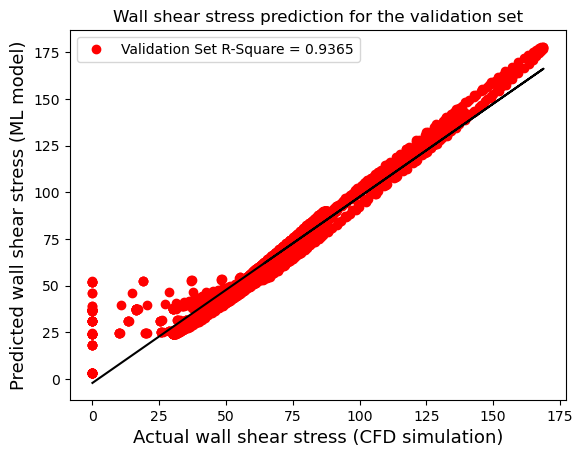

In [3]:
plt.plot(y_test,ValResults,'ro',label='Validation Set R-Square = 0.9365')#{:.4f})'.format(ValR2Value))
# plt.title('Validation Set')
m, b = np.polyfit(y_test,ValResults, 1)

#use red as color for regression line
plt.plot(y_test, m*y_test+b, color='black')
plt.title('Wall shear stress prediction for the validation set') # Validation set
plt.xlabel('Actual wall shear stress (CFD simulation)',fontsize=13)
plt.ylabel('Predicted wall shear stress (ML model)',fontsize=13)
plt.legend(loc='upper left')
plt.savefig('NewT1D1_no_es_WSS_validation_new.png')
plt.savefig('NewT1D1_no_es_WSS_validation_new.eps')

In [2]:
ValResults = numpy.genfromtxt("valresults_WSS_no_es_T1D1.csv", delimiter=",")
ValR2Value = r2_score(y_test,ValResults)
print("Validation Set R-Square=",ValR2Value)

Validation Set R-Square= 0.9287969696981413
